In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df = df.drop(['Unnamed: 32'], axis=1)

#### Distribution Vizzes

In [5]:
B, M = df['diagnosis'].value_counts()
display(f"The total number of Benign cases is {B} while the total total number of Malignant cases is {M}")

'The total number of Benign cases is 357 while the total total number of Malignant cases is 212'

<Axes: xlabel='count', ylabel='diagnosis'>

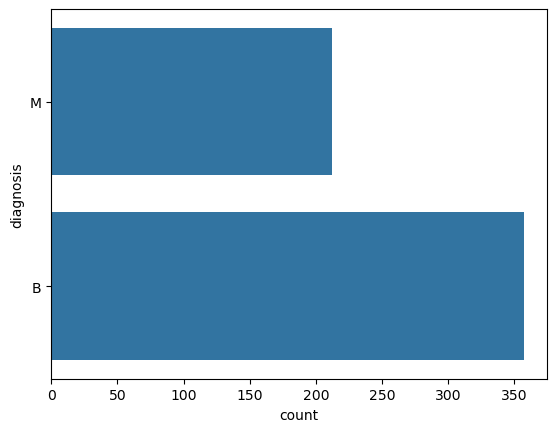

In [6]:
sns.countplot(data=df['diagnosis'])

In [7]:
df.groupby('diagnosis')['radius_mean'].mean()

diagnosis
B    12.146524
M    17.462830
Name: radius_mean, dtype: float64

In [8]:
df_features = df.drop(['id', 'diagnosis'], axis=1)
means = df.groupby('diagnosis')[df_features.columns].mean()
#pd.set_option('display.max_columns', None)
means = means.sort_values(by='diagnosis', ascending=False)
print(means)

           radius_mean  texture_mean  perimeter_mean   area_mean  \
diagnosis                                                          
M            17.462830     21.604906      115.365377  978.376415   
B            12.146524     17.914762       78.075406  462.790196   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
M                 0.102898          0.145188        0.160775   
B                 0.092478          0.080085        0.046058   

           concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
diagnosis                                                              ...   
M                     0.087990       0.192909                0.062680  ...   
B                     0.025717       0.174186                0.062867  ...   

           radius_worst  texture_worst  perimeter_worst   area_worst  \
diagnosis                                                              
M            

#### Bar Plots

In [10]:
means_t = means.T
means_t

diagnosis,M,B
radius_mean,17.462830,12.146524
texture_mean,21.604906,17.914762
perimeter_mean,115.365377,78.075406
area_mean,978.376415,462.790196
smoothness_mean,0.102898,0.092478
compactness_mean,0.145188,0.080085
concavity_mean,0.160775,0.046058
concave points_mean,0.087990,0.025717
symmetry_mean,0.192909,0.174186
fractal_dimension_mean,0.062680,0.062867


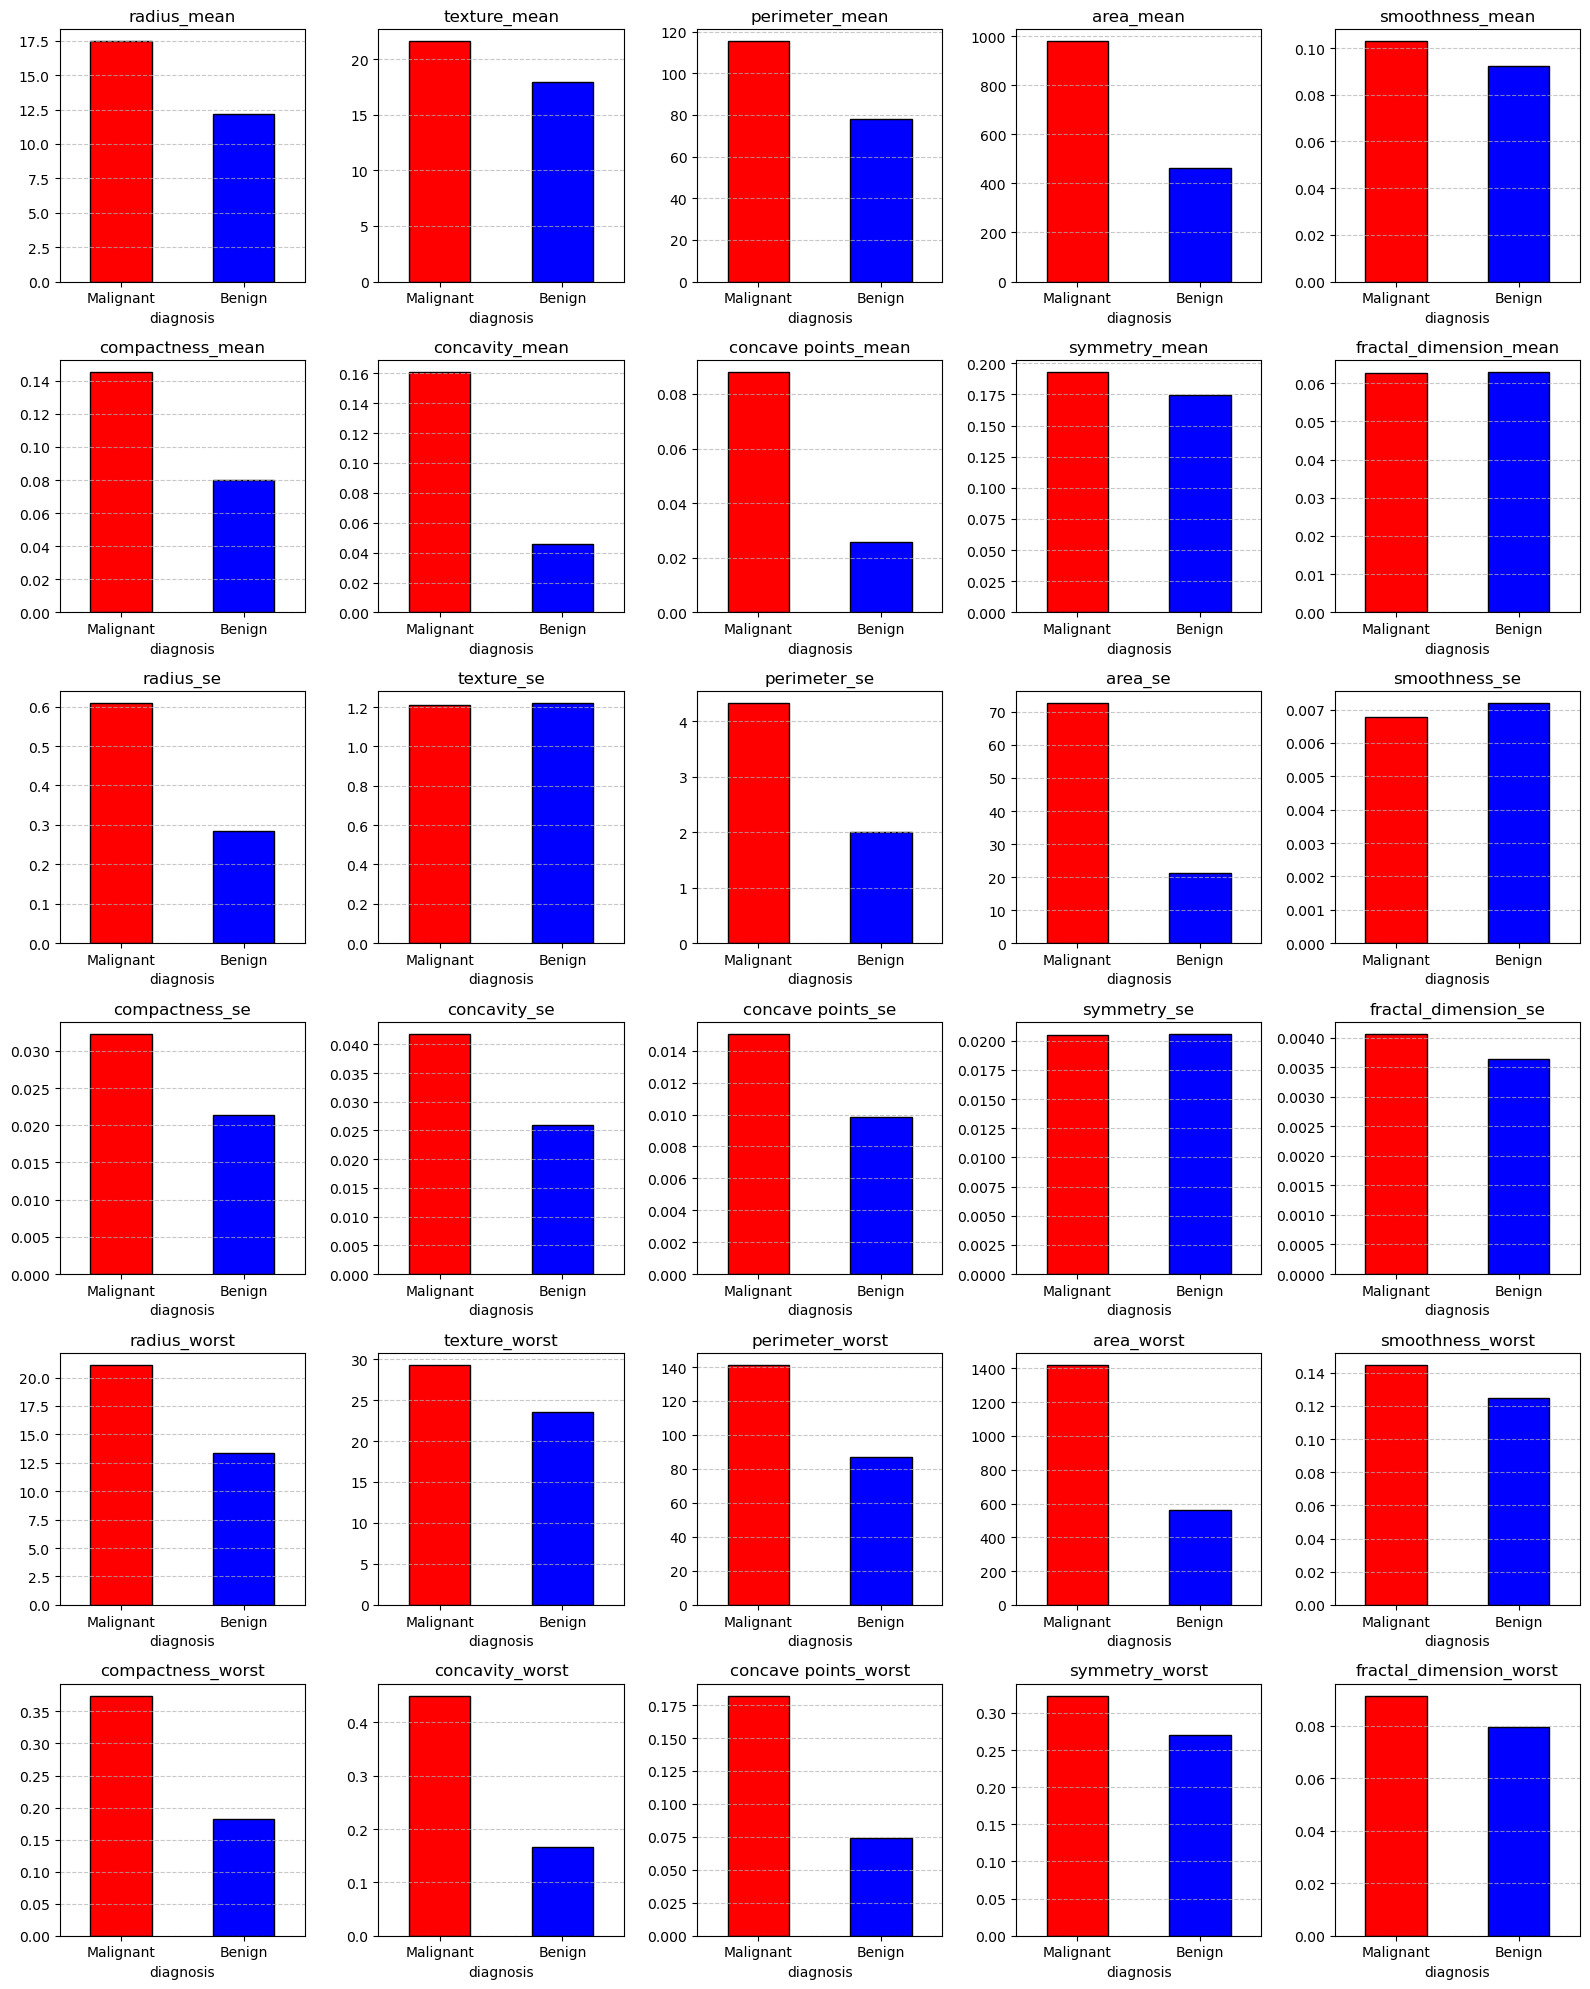

In [11]:
# creating subplots
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(16, 20))
axes = axes.flatten()

# looping through each feature to create a bar plot
for i, feature in enumerate(means_t.index):
    means_t.loc[feature].plot(kind='bar', ax=axes[i], color=['red', 'blue'], edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_xticklabels(['Malignant', 'Benign'], rotation=0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Box Plots

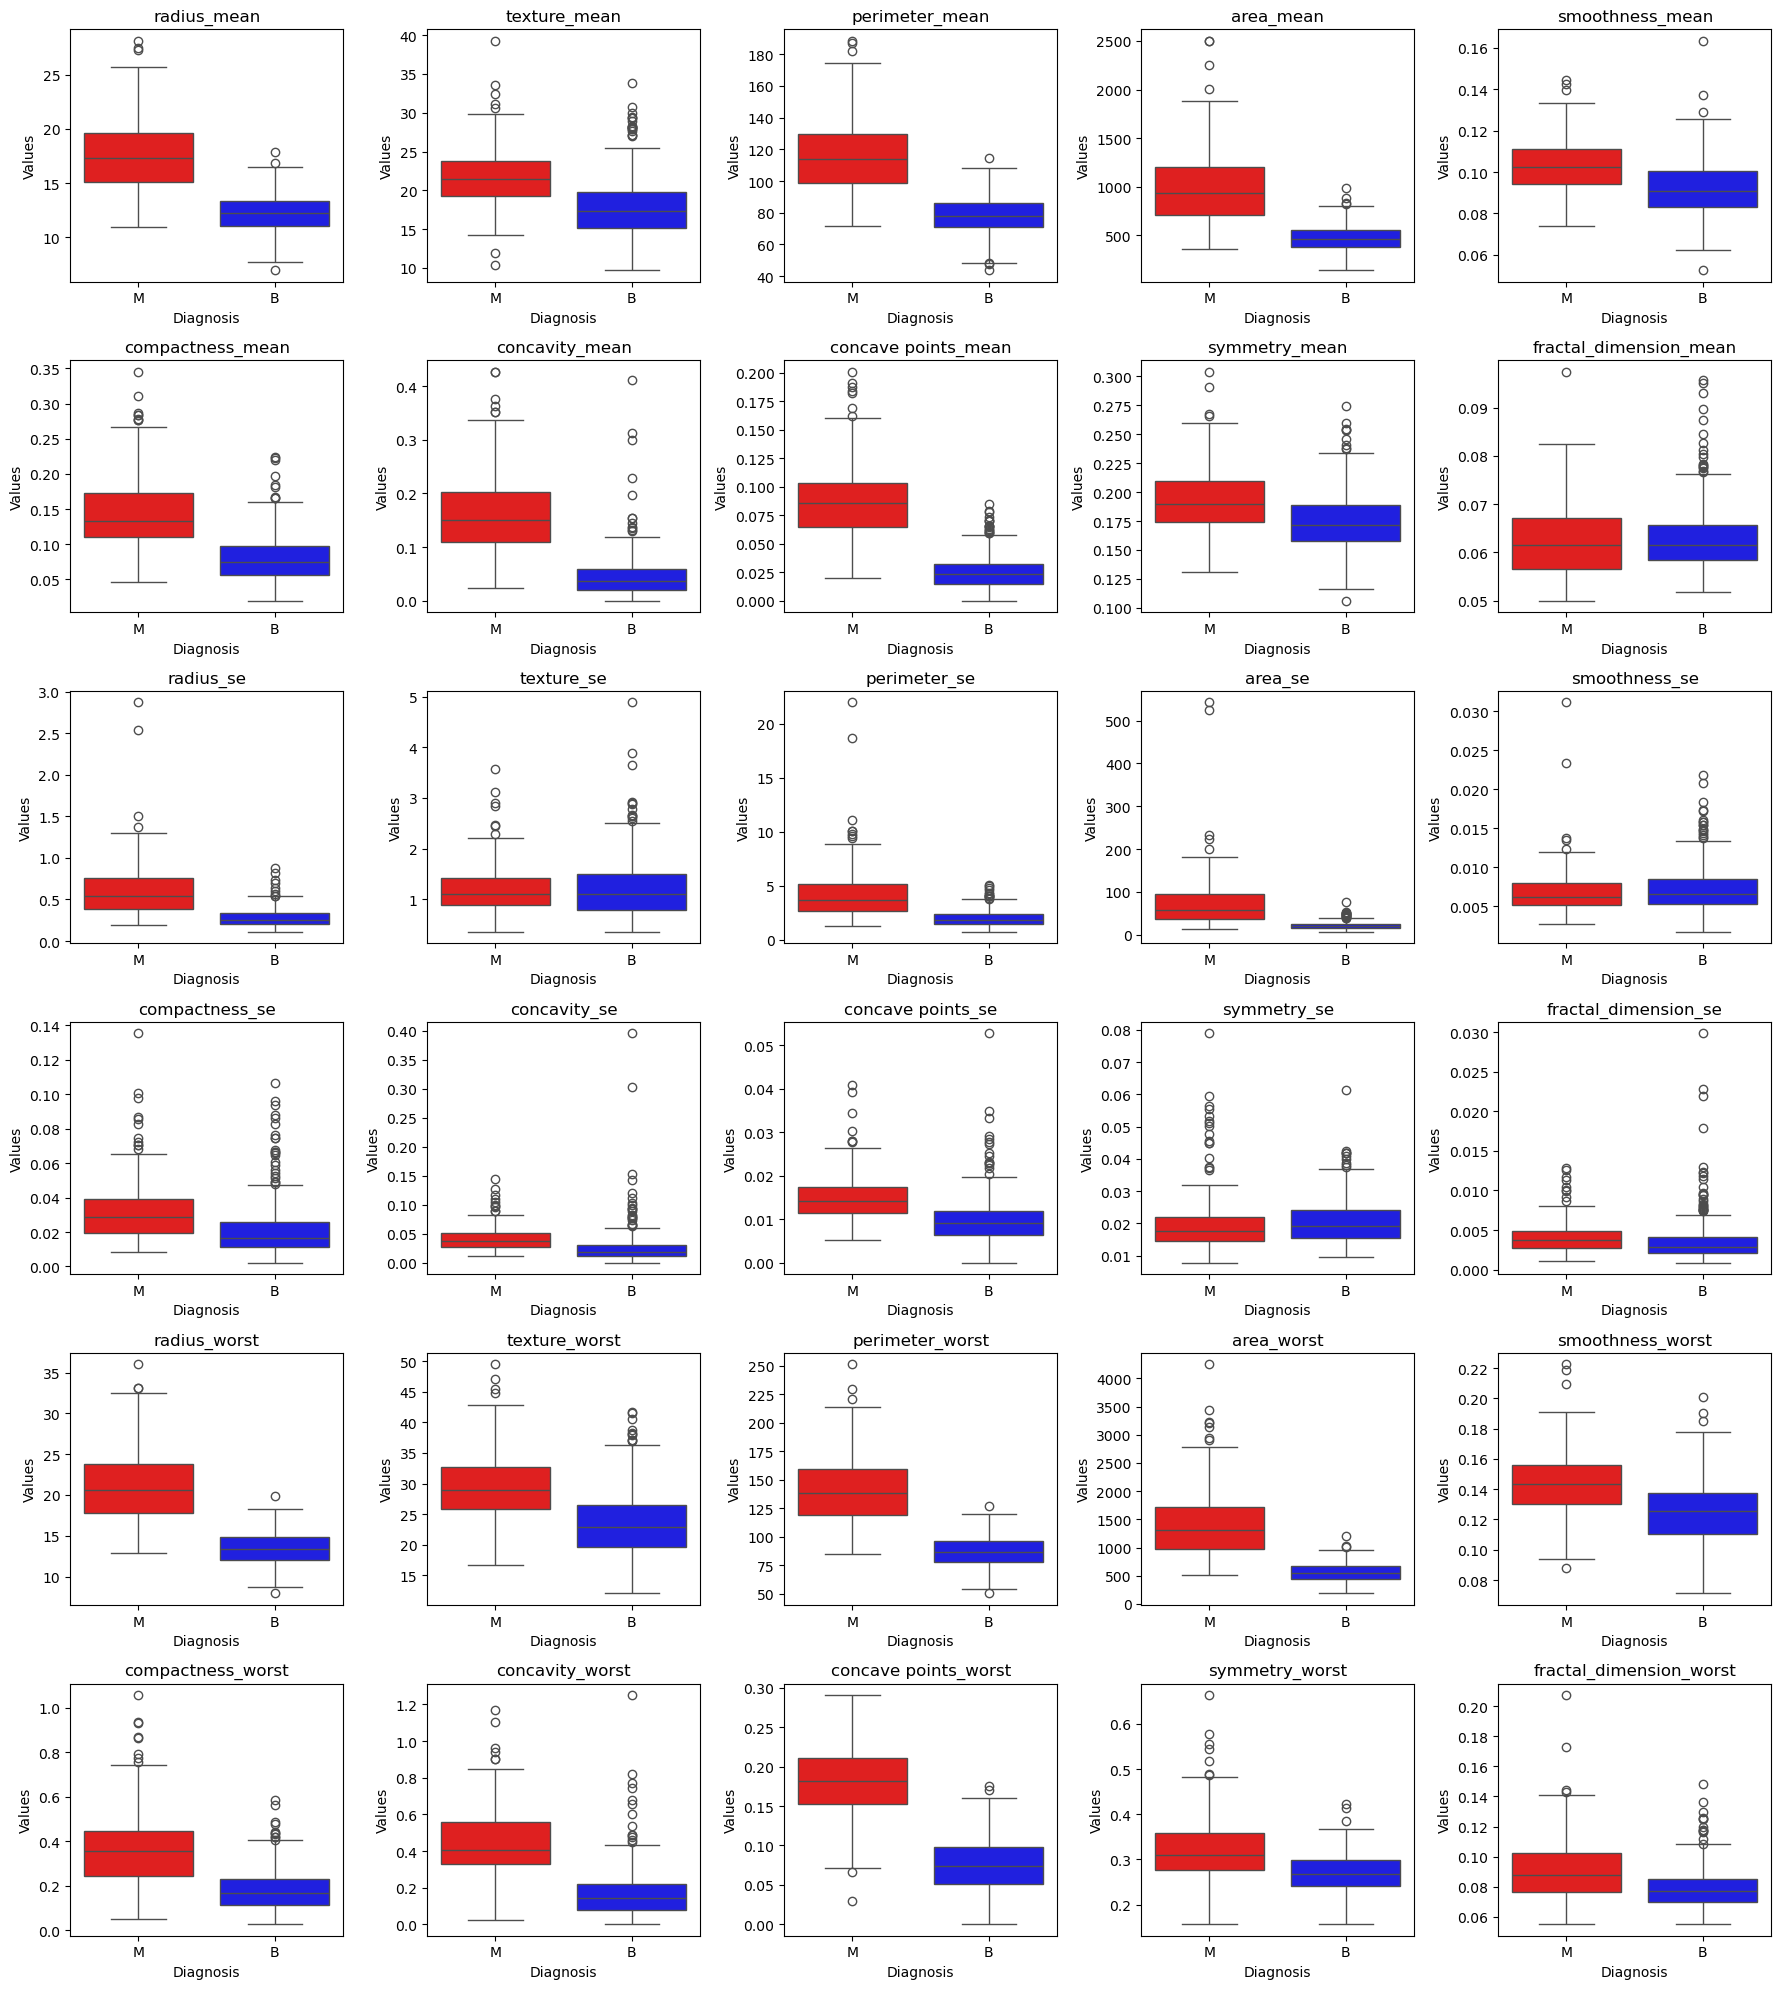

In [13]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(18, 20))
axes = axes.flatten()

for i, feature in enumerate(df_features.columns):
    sns.boxplot(x='diagnosis', y=feature, data=df, ax=axes[i], hue='diagnosis', palette=['red', 'blue'])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel('Values')
    axes[i].grid(False)

plt.tight_layout()
plt.show()

#### Recursive feature elimination with cross validation

Optimal number of features 17


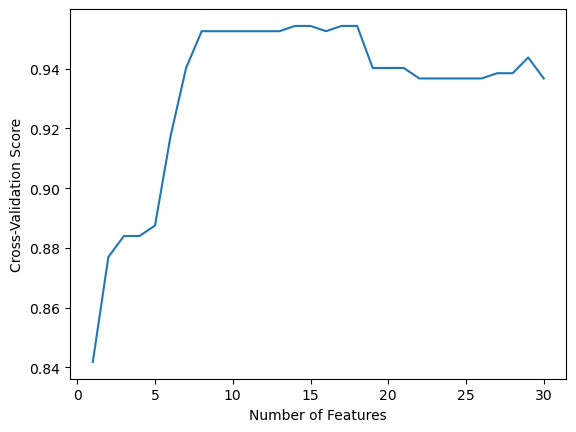

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# data preparation
x = df_features.copy()
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
y = df['diagnosis']

# instantiating the classifier and the cv strategy
classifier = SVC(kernel='linear')
cv_strategy = StratifiedKFold(n_splits=2)

# set up the rfe with cross validation
feature_selector = RFECV(estimator=classifier, step=1, cv=cv_strategy, scoring='accuracy')

# fit the feature selector on the data
feature_selector.fit(x, y)

# printing the optimal number of parameters selected by the rfecv
print(f"Optimal number of features {feature_selector.n_features_}")

# number of features vs. cv scores
mean_scores = feature_selector.cv_results_['mean_test_score'] # contains the cross-validation scores for each number of features

plt.figure()
plt.xlabel("Number of Features")
plt.ylabel("Cross-Validation Score")
plt.plot(range(1, len(mean_scores) + 1), mean_scores)
plt.show()

In [20]:
# optimal features
optimal_features = df_features.columns[feature_selector.support_]
print("The optimal features selected are:")
print(optimal_features)

The optimal features selected are:
Index(['radius_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean', 'texture_se',
       'perimeter_se', 'radius_worst', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


#### Correlation martix of chosen features

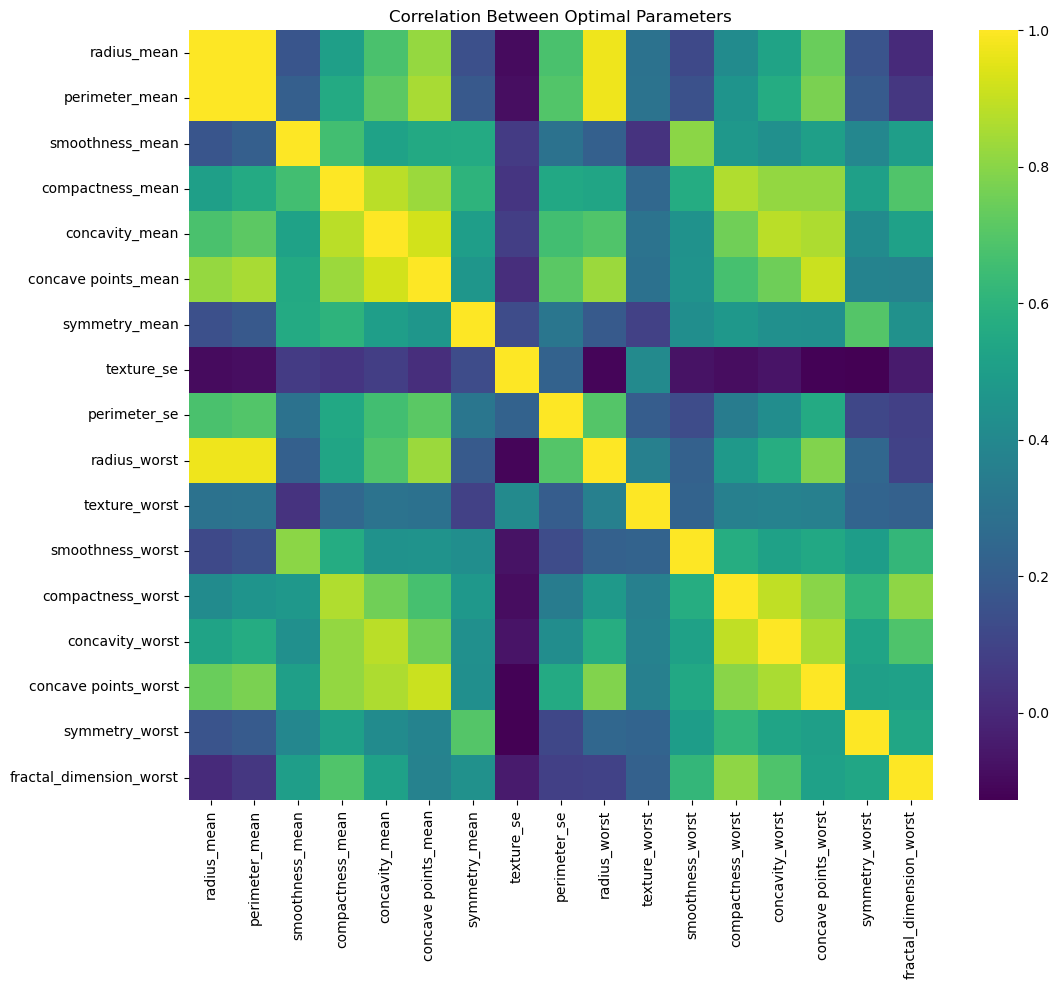

In [30]:
selected_features = df_features[optimal_features]
corr_matrix = selected_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='viridis', annot=False)
plt.title('Correlation Between Optimal Parameters')
plt.show()

In [34]:
# calculating VIF for each feature to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
features = ['radius_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
            'texture_se', 'perimeter_se', 'radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
            'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
X = add_constant(selected_features[features])
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                    Feature          VIF
0                     const   445.864808
1               radius_mean  2067.363648
2            perimeter_mean  2184.463290
3           smoothness_mean     6.759939
4          compactness_mean    28.591109
5            concavity_mean    42.759279
6       concave points_mean    42.920857
7             symmetry_mean     3.492445
8                texture_se     2.440968
9              perimeter_se     4.049448
10             radius_worst    32.589806
11            texture_worst     2.497586
12         smoothness_worst     5.654483
13        compactness_worst    19.308101
14          concavity_worst    26.358492
15     concave points_worst    18.264956
16           symmetry_worst     3.461292
17  fractal_dimension_worst     5.521937


#### Preprocessing

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected_features)

#### SVM Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVC(probability=True, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Accuracy: 0.9649122807017544
Confusion Matrix:
[[69  2]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Incorporating the best parameters obtained from GridSearchCV
model = SVC(C=100, gamma=0.001, kernel='rbf', probability=True, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Accuracy: 0.9824561403508771
Confusion Matrix:
[[71  0]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Accuracy: 0.956140350877193
Confusion Matrix:
[[69  2]
 [ 3 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [50]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Train final model with best parameters
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Print evaluation metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation accuracy: 0.9613569321533924
Test Accuracy: 0.956140350877193
Confusion Matrix:
[[69  2]
 [ 3 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

